In [2]:
# copyright ############################### #
# This file is part of the Xtrack Package.  #
# Copyright (c) CERN, 2021.                 #
# ######################################### #


import xtrack as xt
import xobjects as xo
import xpart as xp

import ducktrack as dtk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from tqdm import tqdm






beta_rel=0.09405801936973575
gamma = 1.004453024014182

I=0.6
L = 2.5 # m cooler length
r_beam=25*1e-3



T_perp = 0.1 # <E> [eV] = kb*T
T_l =  0.01 # <E> [eV]
B = 0.075 # T for LEIR
Z=54

mass0=193729.0248722061*1e6 #eV/c2
c=299792458.0
p0c = mass0*beta_rel*gamma #eV/c

length = 78.54370266 #m
T = length/(c*beta_rel)
ms_per_turn = 1000*T



beta_x=5
beta_y=5
emittance=14*1e-6






num_particles=int(1e5)

#x=np.random.normal(0,np.sqrt(5*emittance) ,num_particles),
#px=np.random.normal(0, np.sqrt(emittance/5), num_particles),
#x=np.linspace(1*1e-3, 20*1e-3, num_particles),
#px=np.random.uniform(0, 0, num_particles),





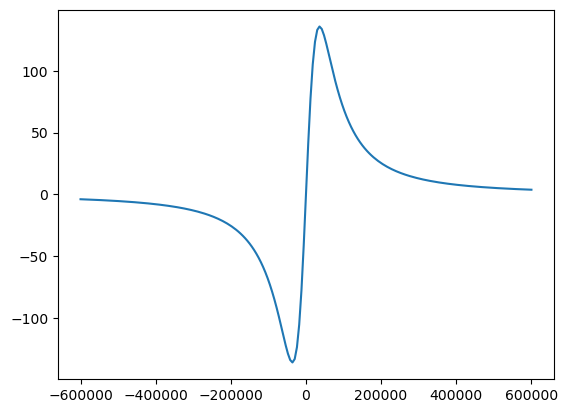

In [3]:
betacool=np.load('friction_force_betacool.npy')

plt.plot(betacool[:,0],-betacool[:,1])

/home/pkruyt/cernbox/xsuite/xtrack/ducktrack/elements.py:966: RuntimeWarning: invalid value encountered in true_divide
  p.theta = np.arctan(p.y/p.x)


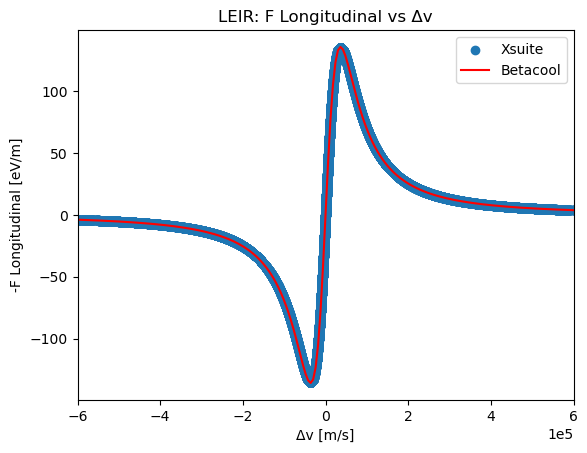

In [4]:
#force againt velocity


dtk_particle = dtk.TestParticles(
    
    mass0=mass0,
    p0c=p0c,
    x=np.random.normal(0,0 ,num_particles),
    px=np.random.normal(0, 4*np.sqrt(emittance/beta_x), num_particles),
    y=0,
    py=0,
    delta=0,
    zeta=0)



dtk_cooler = dtk.elements.ElectronCooler(I=I,L=L,r_beam=r_beam,
                                                T_perp=T_perp,T_l=T_l,
                                                B=B,Z=Z,B_ratio=1e-10,
                                                Neutralisation_space_charge=0,Neutralisation_rotation=0)


force = dtk_cooler.force(dtk_particle)

def temperature_to_velocity_1D(temperature_eV):
    
    T=temperature_eV#J
    mass = 511 *1e3
    velocity = c*np.sqrt( T/ mass)
    return velocity


px_tot = p0c*dtk_particle.px
beta_diff = px_tot/(mass0*gamma)
v_diff = beta_diff*c


plt.figure()
plt.scatter(v_diff,-force,label='Xsuite')
plt.plot(betacool[:,0],-betacool[:,1],color='red',label='Betacool')
#plt.axvline(temperature_to_velocity_1D(T_l),color='black',label='V(T longitudinal)')
#plt.axvline(temperature_to_velocity_1D(T_perp),color='purple',label='V(T transverse)')

plt.xlim([-6*1e5,6*1e5])
#plt.ylim([0,250])
plt.title(f'LEIR: F Longitudinal vs Δv')
plt.legend()
plt.ylabel('-F Longitudinal [eV/m]')
plt.xlabel('Δv [m/s]')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.show()


In [5]:
import numpy as np

# assuming sorted v_diff and force arrays are already defined
mse = np.mean((force - np.interp(v_diff, betacool[:, 0], betacool[:, 1]))**2)
print(f"Mean squared error: {mse}")


Mean squared error: nan


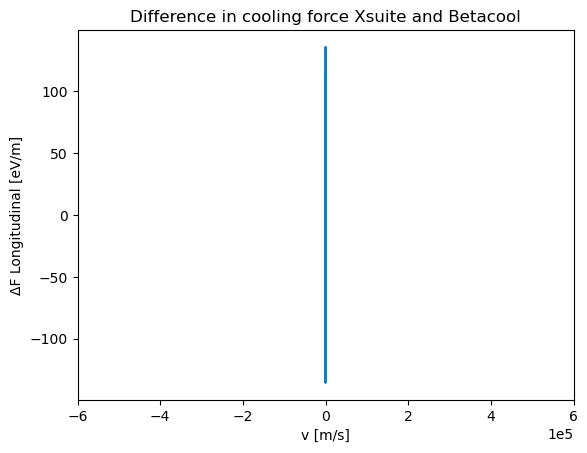

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d



# sort the arrays by v_diff
v_diff_sorted = np.sort(betacool[:, 0])
betacool_sorted = betacool[np.argsort(betacool[:, 0]), 1]

# interpolate the betacool data using v_diff as the interpolation points
betacool_interp = interp1d(v_diff_sorted, betacool_sorted, bounds_error=False, fill_value="extrapolate")

# calculate the difference between force and the interpolated betacool
force_diff = force - betacool_interp(force)

# plot the difference
plt.figure()
plt.plot(force, force_diff)
plt.title('Difference in cooling force Xsuite and Betacool')
plt.ylabel('ΔF Longitudinal [eV/m]')
plt.xlabel('v [m/s]')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.xlim([-6*1e5,6*1e5])
plt.show()

